In [1]:
# Importing all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs
import seaborn as sns

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando os dados de 3 classes.

In [3]:
# Number of examples.
N = 1000

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

### Plotando as 3 classes.

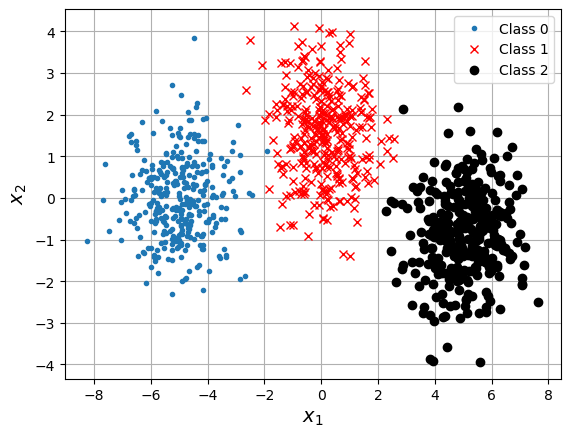

In [4]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.plot(X[idx2,0], X[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Definindo algumas funções úteis.

In [5]:
def to_one_hot(y):
    '''Converte para codificação one-hot.'''
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def from_one_hot(y):
    '''Desfaz a codificação one-hot.'''
    y_ = np.zeros((len(y), 1))
    for i in range(len(y)):
        y_[i] = np.argwhere(y[i,:] == 1)
    return y_

class SoftmaxRegressor():
    '''Classe que implementa o Regressor Softmax.'''
    
    def __init__(self, alpha=0.1, numEpochs=1):
        self.alpha = alpha
        self.numEpochs = numEpochs
        self.A = 0
        self.A_min = 0        

    def hypothesis(self, X, use_a_min=False):
        '''Função hipótese.'''
        if(use_a_min == False):
            g = X.dot(self.A)
        else:
            g = X.dot(self.A_min)
        exps = np.exp(g)
        exp_sums = np.sum(exps, axis=1, keepdims=True)
        return exps / exp_sums

    def error_function(self, X, y, eps=1e-7):    
        '''Função usada para calcular o erro médio cometido pelo classificador.'''
        h = self.hypothesis(X)
        error = -np.mean(np.sum(y * np.log(h + eps), axis=1))
        return error

    def predict(self, X):
        '''Função que classifica os exemplos de entrada.'''
        h = self.hypothesis(X, use_a_min=True)
        c = np.zeros((len(h), 1))
        for i in range(0, len(h)):
            c[i, 0] = np.argwhere(h[i,:] == h[i,:].max())[0]
        return c

    def predict_prob(self, X):
        '''Função que retorna as probabilidades condicionais.'''
        h = self.hypothesis(X)
        return h

    def fit(self, X_train, y_train, X_test, y_test):
        '''Gradient descent solution.'''
        
        # Random initialization of parameters.
        self.A = np.random.randn(X_train.shape[1], y_train.shape[1])

        # Create array for storing error values.
        Jgd = np.zeros(self.numEpochs+1)
        Jgd_v = np.zeros(self.numEpochs+1)

        # Calculate initial error.
        Jgd[0] = self.error_function(X_train, y_train)
        Jgd_v[0] = self.error_function(X_test, y_test)

        # Batch gradient-descent loop.
        minimum_val_error = float("inf")
        iteration = 0
        min_iter = 0
        error = 1
        while iteration < self.numEpochs:
            # Update weights.
            gradients = -(1/len(y_train))*X_train.T.dot(y_train - self.hypothesis(X_train))
            self.A = self.A - alpha*gradients
            
            # Calculating training and validation errors.
            Jgd[iteration+1] = self.error_function(X_train, y_train)
            Jgd_v[iteration+1] = self.error_function(X_test, y_test)
            
            # Early-stopping: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                self.A_min = self.A
                min_iter = iteration

            # Update iteration number.
            iteration += 1
        
        return Jgd, Jgd_v, iteration, self.A_min, minimum_val_error, self.A, min_iter

### Dividindo os dados em conjuntos de treinamento e validação.

In [6]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

# Convert to one-hot encoding.
y_train = to_one_hot(y_train)

# Convert to one-hot encoding.
y_test = to_one_hot(y_test)

### Alterando as matrizes de atributos de treinamento e validação para que implementem o formato apropriado da função discriminante.

O formato apropriado é o de uma reta, conforme mostrado abaixo.

$$g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1 + \hat{a}_2x_2,$$

onde $\hat{a}_0$ é o peso de bias e é sempre feito igual a 1.

Em forma matricial ela é definida como

$$g(\textbf{x}) = \textbf{X}\hat{\textbf{a}},$$

onde $\hat{\textbf{a}}$ e $\textbf{X}$ são um vetor e uma matriz, respectivamente.

In [7]:
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

X_test = np.c_[np.ones((len(y_test), 1)), X_test]

### Treinando o classificador.

In [8]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
numEpochs = 10000

# Instantiate Logistic classifier.
classifier = SoftmaxRegressor(alpha, numEpochs)

# Train the model.
Jgd, Jgd_v, iteration, A_min, minimum_val_error, A, min_iter = classifier.fit(X_train, y_train, X_test, y_test)

# Print smallest error.
print('Iteration:', iteration)
print('Minimum validation error:', minimum_val_error)

Iteration: 10000
Minimum validation error: 0.028634700143868683


### Plotando os erros.

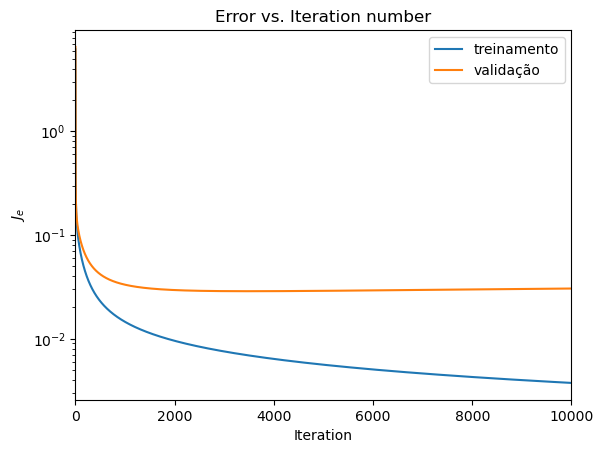

In [9]:
fig = plt.figure()
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

### Calculando a acurácia do classificador.

In [10]:
# Calculate accuracy of class predictions.
y_pred = classifier.predict(X_test)

acc = accuracy_score(from_one_hot(y_test), y_pred)
print('Acurácia:',acc)

Acurácia: 0.988


### Plotando as regiões de decisão.

**OBS:** Notem que a matriz de atributos criada para plotarmos as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

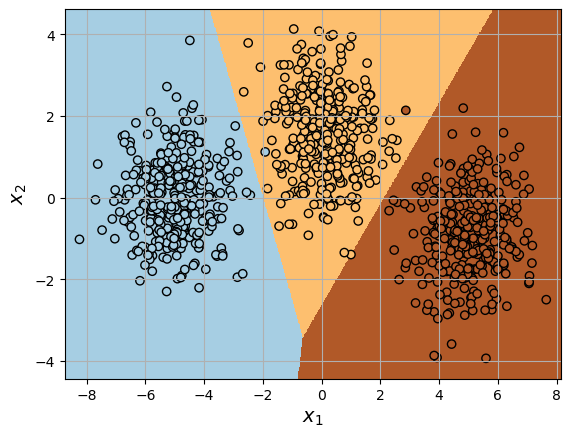

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = classifier.predict(attribute_matrix)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

### Plotando a matriz de confusão.

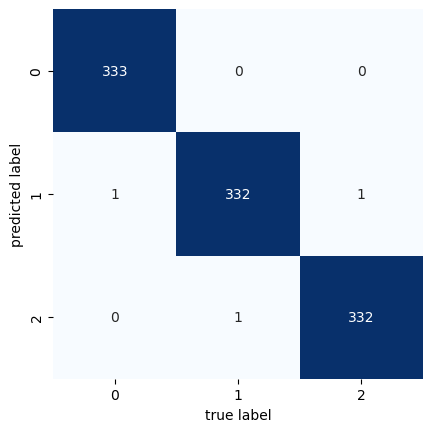

In [12]:
# Plot the confusion matrix
y_pred = classifier.predict(np.c_[np.ones((len(y), 1)), X])

fig = plt.figure()
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(0,3), yticklabels=range(0,3), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()